
----- Training Bag Models for All Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Bagging Ensemble (All Features) Metrics:
Accuracy: 0.9916982673007277
Precision: 0.9917161795838356
Recall: 0.9916982673007277
F1 Score: 0.9916817236361961


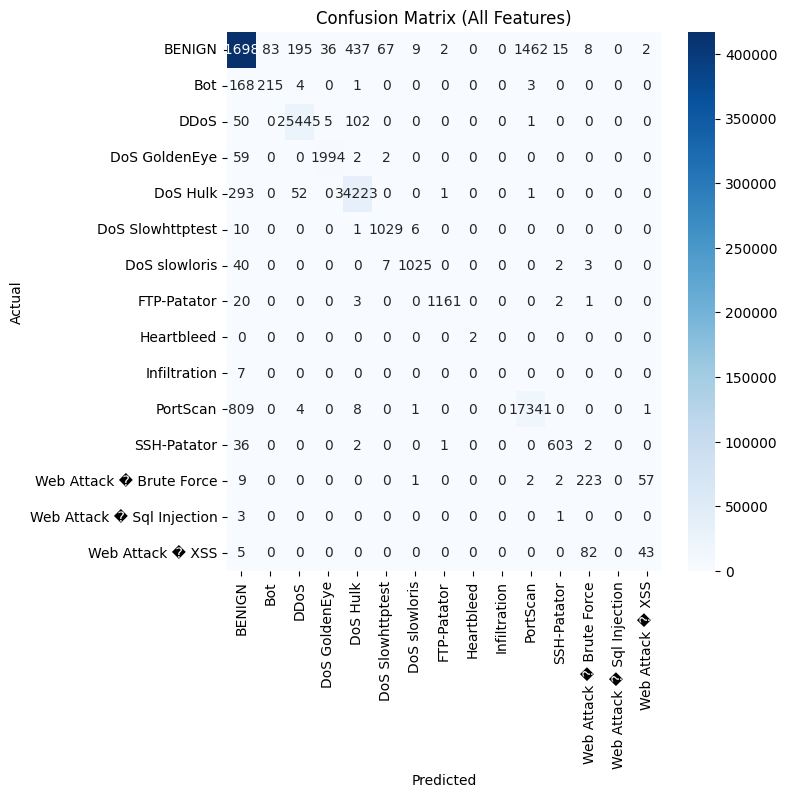


----- Training Bag Models for IG Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Bagging Ensemble (IG Top 5 Features) Metrics:
Accuracy: 0.9881956021432267
Precision: 0.9879534835823156
Recall: 0.9881956021432267
F1 Score: 0.9871523507521454


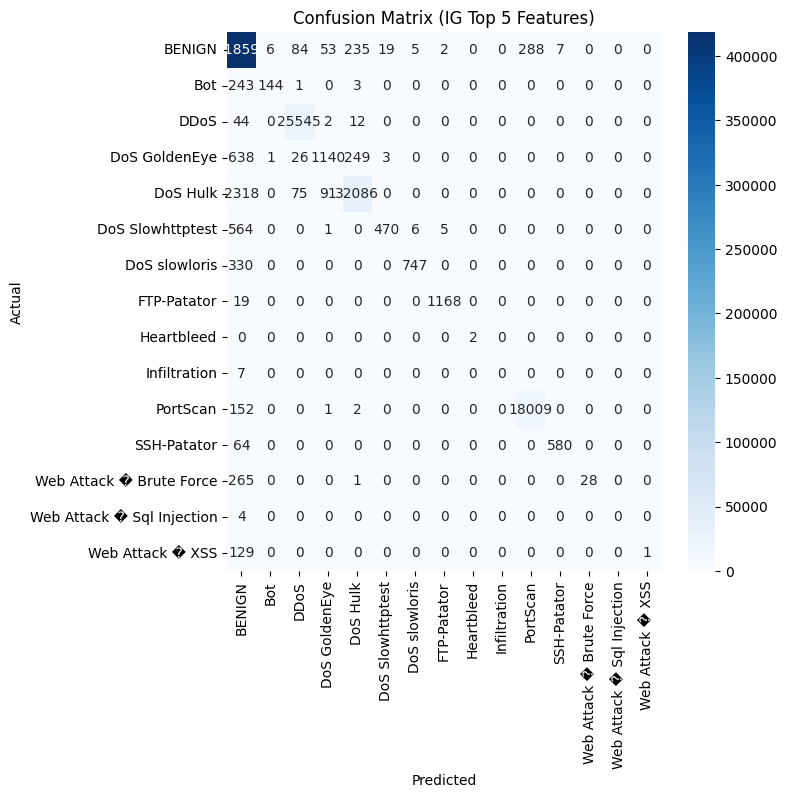


----- Training Bag Models for IG Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Bagging Ensemble (IG Top 10 Features) Metrics:
Accuracy: 0.9884751017398354
Precision: 0.9882512113450824
Recall: 0.9884751017398354
F1 Score: 0.9875028157238505


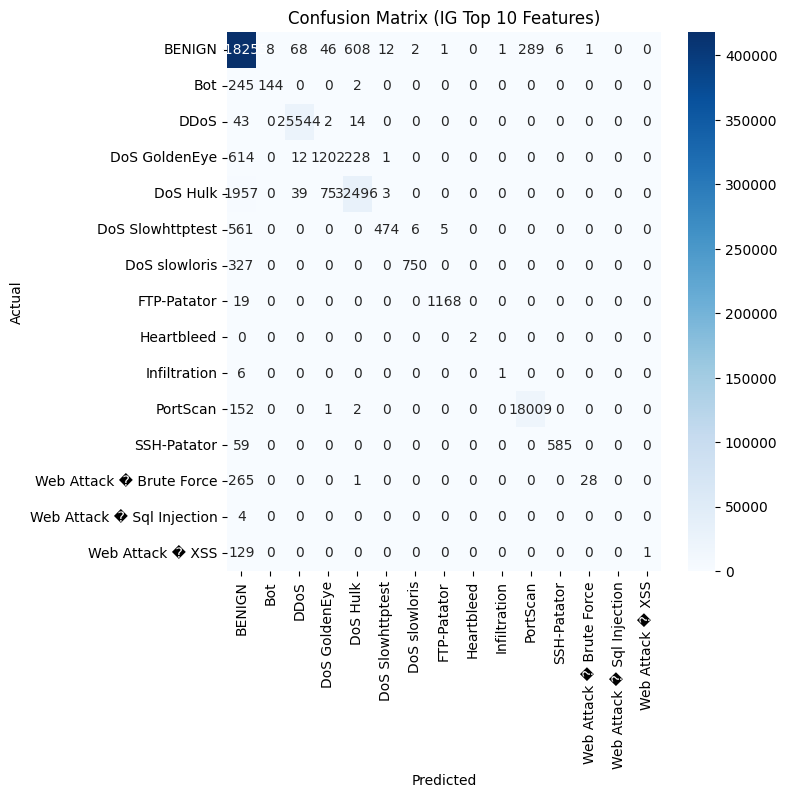


----- Training Bag Models for KBest Top 5 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Bagging Ensemble (KBest Top 5 Features) Metrics:
Accuracy: 0.9537913822939978
Precision: 0.9538409433453218
Recall: 0.9537913822939978
F1 Score: 0.9536892111140093


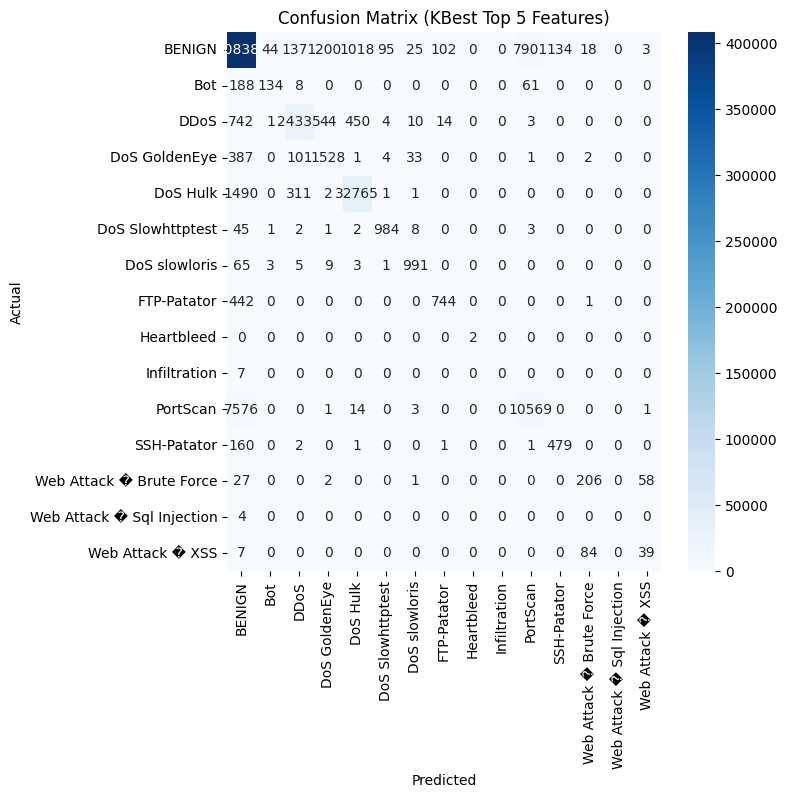


----- Training Bag Models for KBest Top 10 Features -----


/home/ibibers/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Bagging Ensemble (KBest Top 10 Features) Metrics:
Accuracy: 0.9899380145220854
Precision: 0.9898857217028727
Recall: 0.9899380145220854
F1 Score: 0.9898652222951051


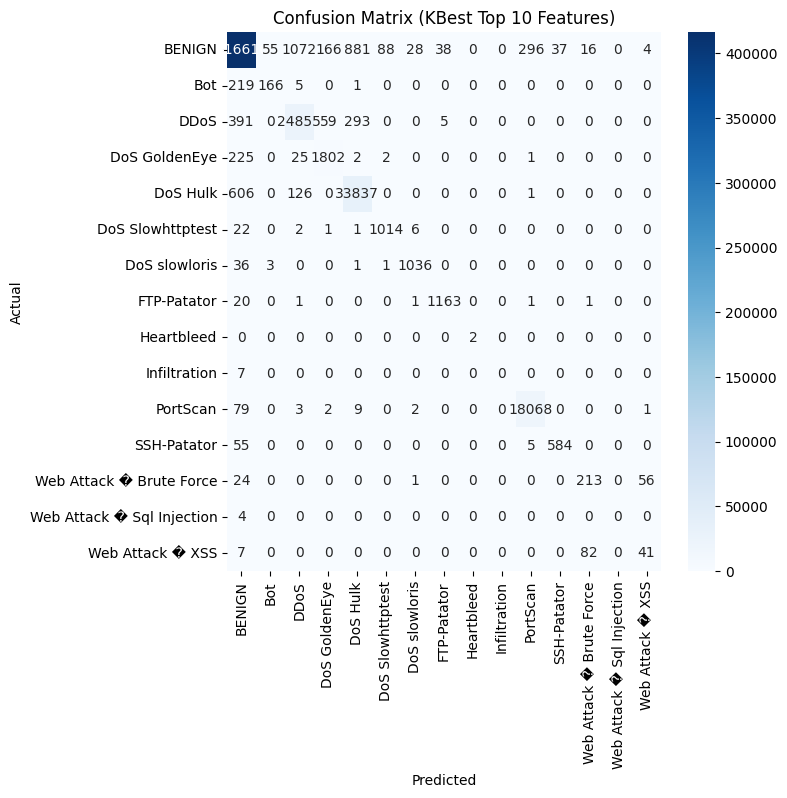

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
import time
import sys
sys.path.append('/home/ibibers/IDS Project/IDS-Machine-Learning-Techniques-')
from CICIDS2017 import data_preprocessing, evaluate_model, plot_confusion_matrix


# ---------------------------- Model Training and Evaluation ----------------------------
results = []
datasets, le = data_preprocessing()
for name, (X_tr, X_te, y_train , y_test) in datasets.items():
    print(f"\n----- Training Bag Models for {name} -----")

    start_time = time.time()

    # Bagging ensemble 
    bagging_model = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=10, random_state=42)

    bagging_model.fit(X_tr, y_train)

    train_end_time = time.time()

    bagging_pred = bagging_model.predict(X_te)

    pred_end_time = time.time()

    metrics = evaluate_model(y_test, bagging_pred, f"Bagging Ensemble ({name})")
    metrics['Training Time (s)'] = train_end_time - start_time
    metrics['Prediction Time (s)'] = pred_end_time - train_end_time
    metrics['Total Time (s)'] = pred_end_time - start_time
    results.append(metrics)

    plot_confusion_matrix(y_test, bagging_pred, le.classes_, f"Confusion Matrix ({name})")


In [2]:
# ---------------------------- Summary and Save Results ----------------------------
import pandas as pd
summary = pd.DataFrame(results)
print("\nSummary of Results:")
print(summary)

summary.to_csv("Bag_ensemble_classifier_evaluation_summary.csv", index=False)



Summary of Results:
                                      Model  Accuracy  Precision    Recall  \
0           Bagging Ensemble (All Features)  0.991698   0.991716  0.991698   
1      Bagging Ensemble (IG Top 5 Features)  0.988196   0.987953  0.988196   
2     Bagging Ensemble (IG Top 10 Features)  0.988475   0.988251  0.988475   
3   Bagging Ensemble (KBest Top 5 Features)  0.953791   0.953841  0.953791   
4  Bagging Ensemble (KBest Top 10 Features)  0.989938   0.989886  0.989938   

   F1 Score  Training Time (s)  Prediction Time (s)  Total Time (s)  
0  0.991682          25.084717          9444.052117     9469.136834  
1  0.987152          40.239134          5392.052631     5432.291764  
2  0.987503          68.608632          7674.601501     7743.210133  
3  0.953689          39.508234           326.804917      366.313150  
4  0.989865          77.630730           223.837726      301.468456  
